<div style="text-align: left; background-color:#FFFFCC; font-family:Arial; color:#526085; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 58px;border-style: solid;border-color: dark green;">Lab 02: Working with time-series data</div>
<div style="text-align: left; background-color:#99FFFF; font-family: Arial; color:#551184; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 18px">Bộ môn: Trực quan hóa dữ liệu | Nhóm 8</div>

# <div style="text-align: left; background-color:#0C6A86; font-family:Arial; color:white; padding: 12px; line-height:1.25;border-radius:1px; margin-bottom: 0em; text-align: center; font-size: 30px;border-style: solid;border-color: black;">PHẦN 2. Trực quan hóa dữ liệu</div>

# Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import plotly.express as px
import plotly.graph_objects as go

# !pip install pyproj
# !pip install keras
# !pip install tensorflow
from pyproj import Transformer, CRS

import math
from keras.models import Sequential
from keras.layers import Input, LSTM, Dense
from sklearn.metrics import mean_squared_error

# Nội dung chính

## Đọc dữ liệu

In [2]:
df = pd.read_csv("Data/data_18_19_processed.csv")
df.head()

Reference Number  Grid Ref: Easting  Grid Ref: Northing  Number of Vehicles  \
0          51B0230             433936              428874                   1   
1          51B0349             430076              433872                   1   
2          51B0349             430076              433872                   1   
3          51B0349             430076              433872                   1   
4          51B0349             430076              433872                   1   

   1st Road Class 1st Road Class & No  Road Surface  Lighting Conditions  \
0               6                   U             1                    4   
1               6                   U             2                    1   
2               6                   U             2                    1   
3               6                   U             2                    1   
4               6                   U             2                    1   

   Weather Conditions Local Authority  Type of Vehicle  Casualty Class  \
0                   1       E08000035                9               3   
1                   1       E08000035               11               2   
2                   1       E08000035               11               2   
3                   1       E08000035               11               2   
4                   1       E08000035               11               2   

   Casualty Severity  Sex of Casualty  Age of Casualty            Full Time  
0                  3                2               87  2018-01-11 07:00:00  
1                  3                2               60  2018-01-11 08:55:00  
2                  3                2               51  2018-01-11 08:55:00  
3                  3                2               50  2018-01-11 08:55:00  
4                  3                2               51  2018-01-11 08:55:00

## Trực quan hóa dữ liệu

### Biểu đồ

**Tiêu đề:** Thống kê số tai nạn tại các khung giờ của các ngày trong tuần.

**Loại biểu đồ:** Heatmap.

**Lý do lựa chọn:**
- **Trực quan hóa dễ hiểu và chi tiết**: Heatmap là một công cụ trực quan hóa dữ liệu mạnh mẽ, giúp biểu diễn thông tin theo cách dễ nhìn và dễ hiểu. Biểu đồ này sử dụng các màu sắc khác nhau để thể hiện mức độ thay đổi của số lượng tai nạn qua các khung giờ và các ngày trong tuần, giúp người đọc dễ dàng nhận thấy những thời điểm có nguy cơ cao.

- **Dễ thấy sự khác biệt và xu hướng**: Sự thay đổi màu sắc trên Heatmap giúp người đọc dễ dàng nhận ra các xu hướng và điểm nóng trong dữ liệu. Chẳng hạn, những ô màu đậm hơn chỉ ra thời điểm và ngày có số lượng tai nạn cao hơn, cho phép dễ dàng xác định các khung giờ và ngày nguy hiểm nhất.

- **Phân tích theo thời gian và không gian**: Với Heatmap, chúng ta có thể phân tích dữ liệu tai nạn theo cả thời gian (giờ trong ngày) và không gian (ngày trong tuần). Điều này rất hữu ích để phát hiện ra các mẫu hoặc xu hướng tiềm ẩn trong dữ liệu, từ đó có thể đề xuất các biện pháp cải thiện an toàn giao thông.

**Trực quan hóa:**

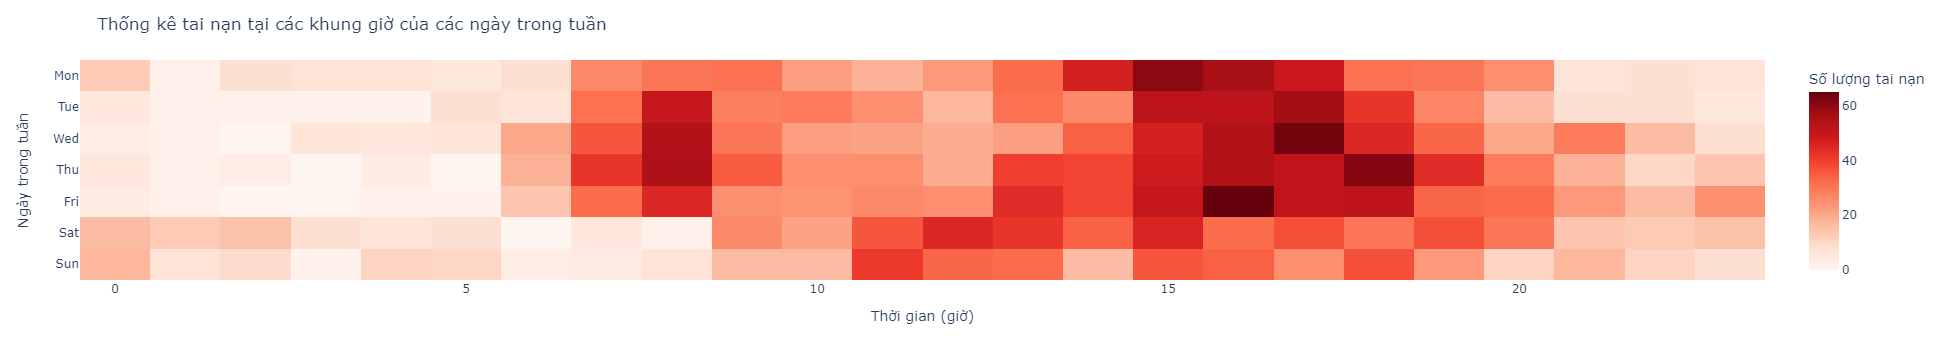

In [3]:
# Tạo ma trận 7 ngày x 24 giờ
matrix_ = np.zeros((7, 24), dtype=int)

# Đếm số tai nạn xảy ra trong các khung giờ
df['Full Time'] = pd.to_datetime(df['Full Time'])
full_time = df['Full Time']

for time in full_time:
    i = time.weekday()
    j = time.hour
    matrix_[i][j] += 1

day_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

# Tạo bản đồ nhiệt
fig = px.imshow(
    matrix_,
    labels=dict(x="Thời gian (giờ)", y="Ngày trong tuần", color="Số lượng tai nạn"),
    x=list(range(24)),
    y=day_of_week,
    color_continuous_scale='reds',
    aspect="auto"
)

fig.update_layout(
    title="Thống kê tai nạn tại các khung giờ của các ngày trong tuần",
    xaxis_title="Thời gian (giờ)",
    yaxis_title="Ngày trong tuần"
)
fig.update_traces(
    hovertemplate="Thời gian: %{x}h<br>Ngày: %{y}<br>Số lượng tai nạn: %{z}<extra></extra>"
)
fig.show()


**Kỹ thuật trực quan sử dụng:**

- ***Màu sắc***: Heatmap sử dụng các sắc độ của màu đỏ để biểu thị số lượng tai nạn giao thông tại các khung giờ và các ngày trong tuần. Các sắc độ màu từ nhạt đến đậm thể hiện mức độ gia tăng của số lượng tai nạn:
    - Màu đỏ nhạt: số lượng tai nạn ít.
    - Màu đỏ đậm: số lượng tai nạn nhiều.
    - Sắc độ màu càng đậm, số lượng tai nạn càng cao; sắc độ màu càng nhạt, số lượng tai nạn càng thấp.

- ***Kỹ thuật Manipulate View:***
  + **Hiển thị chi tiết qua tooltip**: Khi người dùng trỏ chuột vào từng ô trong heatmap, một tooltip sẽ xuất hiện hiển thị số lượng tai nạn cụ thể tại khung giờ và ngày trong tuần đó. Điều này giúp người dùng có thể xem thông tin chi tiết mà không cần phải xem toàn bộ dữ liệu cùng một lúc.
  + **Tùy chỉnh giao diện hiển thị**: Heatmap có thể được thiết kế để cho phép người dùng lọc hoặc thay đổi phạm vi thời gian hoặc ngày trong tuần, từ đó tập trung vào các khoảng thời gian hoặc ngày cụ thể mà họ quan tâm. Ví dụ, người dùng có thể chọn xem chỉ số tai nạn trong các ngày cuối tuần hoặc trong giờ cao điểm.

$\Rightarrow$ Giúp đồ thị heatmap trở nên rõ ràng, trực quan, và tương tác thân thiện với người dùng, cho phép họ dễ dàng nắm bắt được các xu hướng và điểm nóng về số lượng tai nạn giao thông.

**Nhận xét:**

- Nhìn chung, số lượng tai nạn giao thông có sự phân bố không đồng đều theo các khung giờ trong ngày và các ngày trong tuần.
- Số lượng tai nạn cao nhất thường xảy ra vào giờ cao điểm buổi sáng và buổi chiều (khoảng 7-9 giờ sáng và 15-17 giờ chiều). Đây là các khoảng thời gian mà mật độ giao thông cao nhất do mọi người di chuyển đến và rời khỏi nơi làm việc.
- Thứ Ba và thứ Sáu có số lượng tai nạn cao nhất trong tuần. Điều này có thể do thứ Ba là ngày làm việc đầu tuần sau thứ Hai (thường có ít tai nạn hơn) và thứ Sáu là ngày cuối tuần, khi mọi người có xu hướng vội vàng hoàn thành công việc để về nhà hoặc chuẩn bị cho các hoạt động cuối tuần.
- Thứ Hai và Chủ Nhật có số lượng tai nạn thấp hơn so với các ngày khác trong tuần. Thứ Hai có thể ít tai nạn hơn vì mọi người thường cẩn thận hơn sau kỳ nghỉ cuối tuần. Chủ Nhật, là ngày nghỉ, mật độ giao thông thấp hơn nên số lượng tai nạn cũng giảm.

$\Rightarrow$ Từ đó cho thấy tầm quan trọng của việc quản lý và kiểm soát giao thông vào các khung giờ cao điểm và các ngày có mật độ giao thông cao để giảm thiểu số lượng tai nạn. Cũng cần có các biện pháp phòng ngừa tai nạn đặc biệt vào thứ Ba và thứ Sáu.

### Biểu đồ

**Tiêu đề:** Phân bố Mức độ Thương tích

**Loại biểu đồ:** Biểu đồ cột (Bar chart).

**Lý do lựa chọn:**
- **Trực quan hóa rõ ràng và trực tiếp**: Biểu đồ cột là một công cụ trực quan hóa dữ liệu đơn giản và hiệu quả, giúp biểu diễn số lượng sự kiện trong các nhóm khác nhau một cách rõ ràng. Trong biểu đồ này, mức độ thương tích được chia thành các nhóm (1, 2, 3) và số lượng sự kiện trong mỗi nhóm được biểu diễn bằng chiều cao của các cột.

- **Dễ dàng so sánh số lượng giữa các nhóm**: Sự khác biệt về chiều cao của các cột giúp người đọc dễ dàng so sánh số lượng sự kiện giữa các nhóm mức độ thương tích. Nhìn vào biểu đồ, ta có thể nhanh chóng nhận ra rằng mức độ thương tích 3 có số lượng sự kiện cao nhất, trong khi mức độ thương tích 1 và 2 có số lượng sự kiện thấp hơn nhiều.

- **Tập trung vào một khía cạnh cụ thể**: Biểu đồ cột giúp tập trung vào một khía cạnh cụ thể của dữ liệu, đó là mức độ thương tích. Điều này rất hữu ích khi cần phân tích sâu về mức độ nghiêm trọng của các thương tích, từ đó đưa ra các biện pháp phòng ngừa và cải thiện an toàn trong các tình huống tương tự.

**Trực quan hóa:**

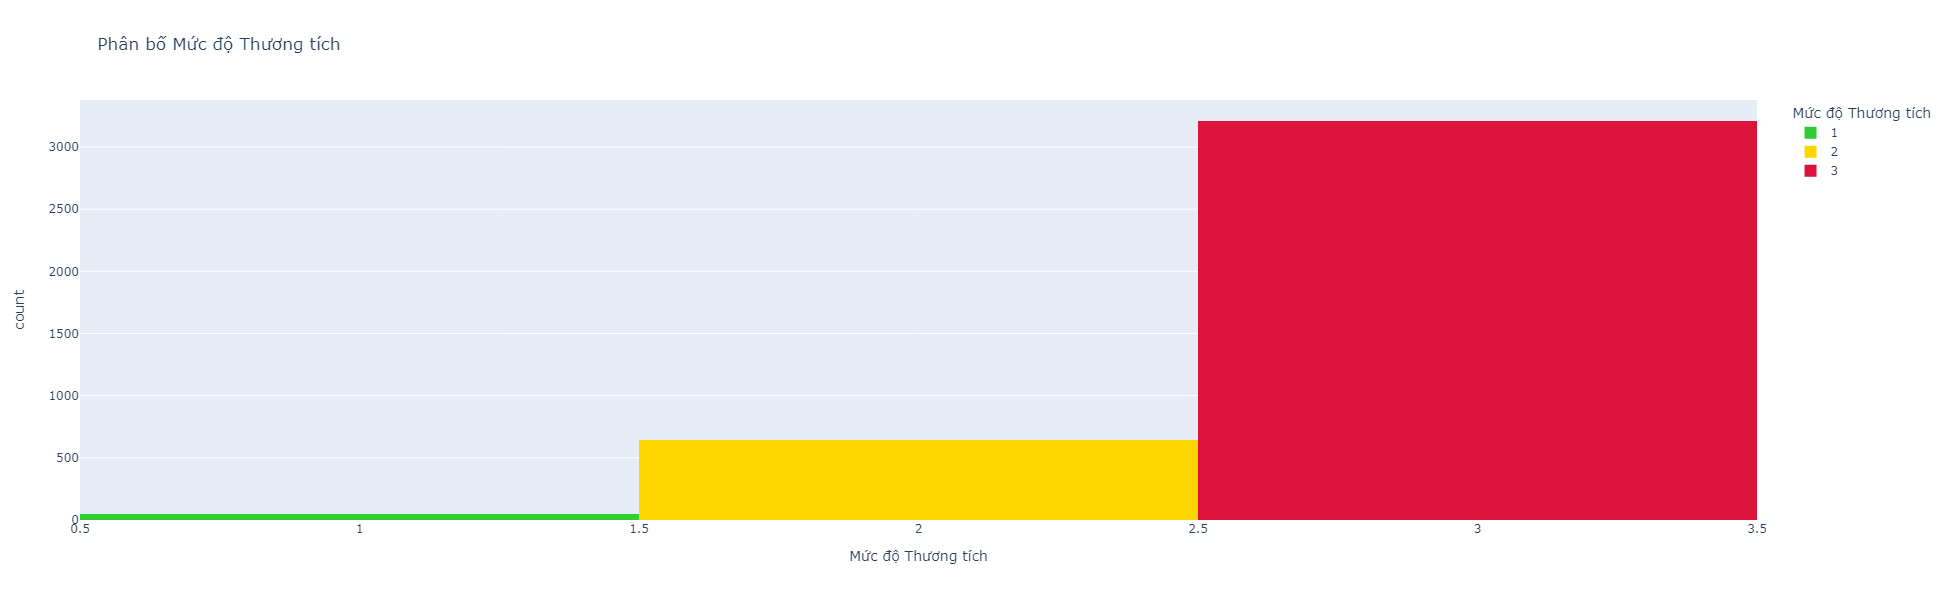

In [4]:
fig = px.histogram(df, x='Casualty Severity', 
                   title='Phân bố Mức độ Thương tích',
                   category_orders={"Casualty Severity": [1, 2, 3]},
                   labels={"Casualty Severity": "Mức độ Thương tích"},
                   color='Casualty Severity',
                   color_discrete_map={1: "#32CD32", 2: "#FFD700", 3: "#DC143C"})

fig.update_layout(width=1000, height=600)  
fig.show()

**Kỹ thuật trực quan sử dụng:**

- ***Màu sắc***: Biểu đồ cột sử dụng các màu sắc khác nhau để biểu thị các mức độ thương tích, giúp người xem dễ dàng phân biệt và nhận diện số lượng sự kiện ở từng mức độ.
    - Màu xanh lá: biểu thị mức độ thương tích 1.
    - Màu vàng: biểu thị mức độ thương tích 2.
    - Màu đỏ: biểu thị mức độ thương tích 3.
    - Sự thay đổi màu sắc giúp làm nổi bật sự chênh lệch số lượng sự kiện giữa các mức độ thương tích, với mức độ thương tích 3 có số lượng sự kiện cao nhất.

- ***Kỹ thuật Manipulate View:***
  + **Hiển thị chi tiết qua tooltip**: Khi người dùng trỏ chuột vào từng cột trong biểu đồ, một tooltip sẽ xuất hiện hiển thị số lượng sự kiện cụ thể tại mức độ thương tích đó. Điều này giúp người dùng có thể xem thông tin chi tiết mà không cần phải xem toàn bộ dữ liệu cùng một lúc.
  + **Tùy chỉnh giao diện hiển thị**: Biểu đồ cột có thể được thiết kế để cho phép người dùng lọc hoặc thay đổi phạm vi mức độ thương tích, từ đó tập trung vào các mức độ cụ thể mà họ quan tâm. Ví dụ, người dùng có thể chọn xem chỉ số lượng sự kiện ở mức độ thương tích 2 và 3 để so sánh.

$\Rightarrow$ Giúp đồ thị biểu đồ cột trở nên rõ ràng, trực quan, và tương tác thân thiện với người dùng, cho phép họ dễ dàng nắm bắt được sự phân bố số lượng sự kiện theo mức độ thương tích.

**Nhận xét:**

- Nhìn chung, số lượng sự kiện có sự phân bố không đồng đều giữa các mức độ thương tích.
- Số lượng sự kiện cao nhất xảy ra ở mức độ thương tích 3, với số lượng vượt trội so với các mức độ thương tích 1 và 2. Điều này có thể chỉ ra rằng mức độ thương tích 3 là mức độ phổ biến nhất hoặc xảy ra trong những tình huống nghiêm trọng hơn.
- Mức độ thương tích 2 có số lượng sự kiện ít hơn so với mức độ thương tích 3 nhưng vẫn đáng kể. Điều này có thể phản ánh các sự kiện có mức độ nghiêm trọng trung bình.
- Mức độ thương tích 1 có số lượng sự kiện thấp nhất, cho thấy những tình huống ít nghiêm trọng hơn.

$\Rightarrow$ Từ đó cho thấy tầm quan trọng của việc quản lý và kiểm soát an toàn để giảm thiểu số lượng sự kiện nghiêm trọng. Cần có các biện pháp đặc biệt để ngăn ngừa và giảm thiểu các sự kiện dẫn đến mức độ thương tích cao nhất (mức độ 3).

#### Mở rộng: tìm hiểu những yếu tố ảnh hưởng trong các vụ tai nạn

**Tiêu đề:** Các yếu tố ảnh hưởng Mức độ Thương tích (Tất cả)

**Loại biểu đồ:** Biểu đồ đường song song (Parallel Coordinates Plot).

**Lý do lựa chọn:**
- **Phân tích đa biến hiệu quả**: Biểu đồ đường song song là một công cụ trực quan hóa mạnh mẽ để phân tích các mối quan hệ giữa nhiều biến số. Trong biểu đồ này, các yếu tố như 1st Road Class, Road Surface, Lighting Conditions, và Weather Conditions đều được biểu diễn, giúp chúng ta hiểu rõ hơn về tác động của từng yếu tố đến mức độ thương tích.
- **Dễ dàng nhận diện mẫu và xu hướng**: Các đường nối giữa các trục giúp người đọc nhận ra các mẫu và xu hướng chung. Ví dụ, chúng ta có thể dễ dàng thấy được sự tương quan giữa điều kiện đường và mức độ thương tích.
- **Hỗ trợ phân tích chi tiết với bộ lọc**: Biểu đồ cho phép người dùng sử dụng bộ lọc để chỉ hiển thị dữ liệu liên quan đến một mức độ thương tích cụ thể (Severity 1, Severity 2, Severity 3), từ đó dễ dàng tập trung vào các khía cạnh chi tiết của dữ liệu.

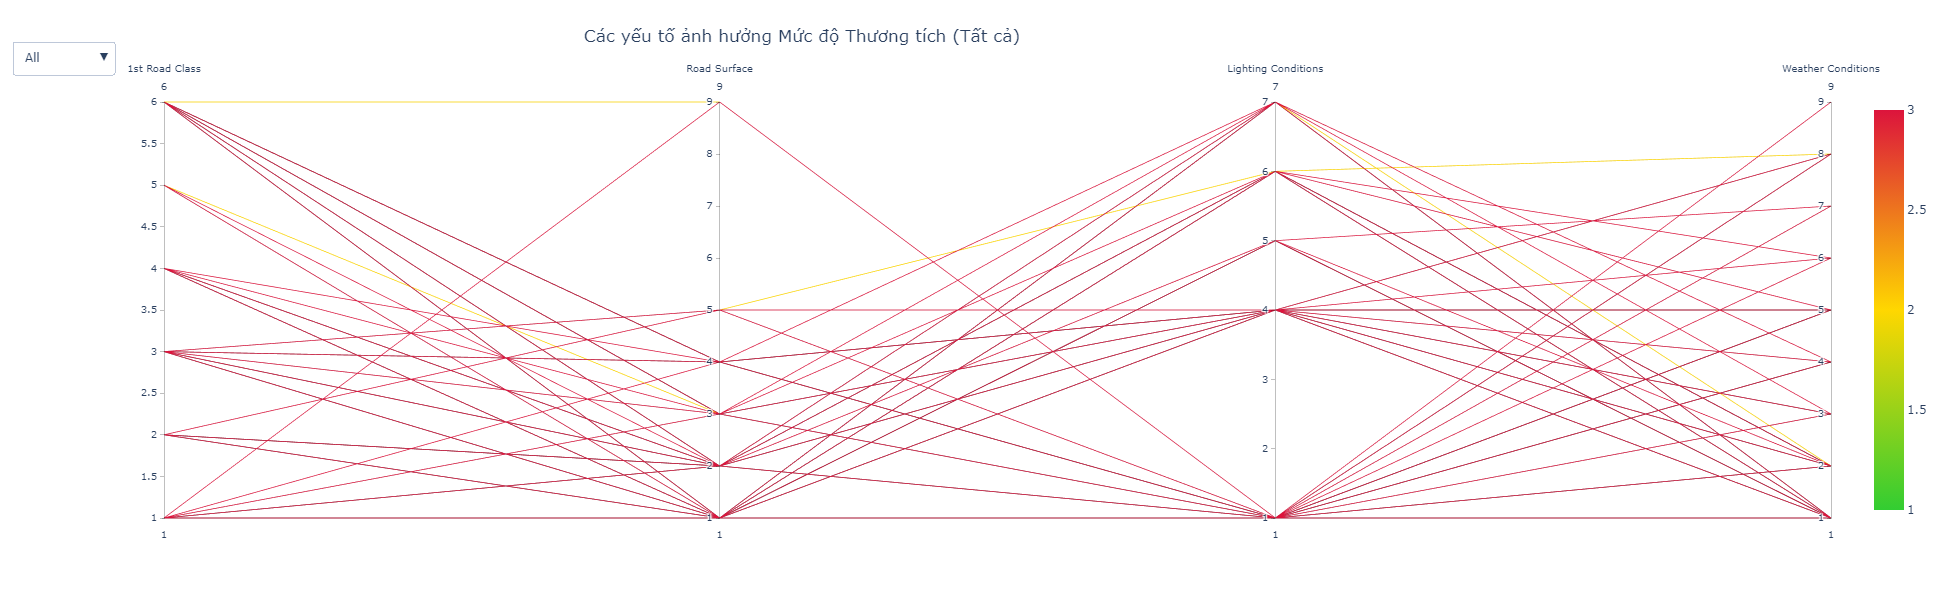

In [5]:
selected_columns = ['1st Road Class', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Casualty Severity']
subset_df = df[selected_columns]

# Tạo dữ liệu cho từng mức độ thương tích
severity_all = subset_df
severity_1 = subset_df[subset_df['Casualty Severity'] == 1]
severity_2 = subset_df[subset_df['Casualty Severity'] == 2]
severity_3 = subset_df[subset_df['Casualty Severity'] == 3]

# Khởi tạo biểu đồ ban đầu với tất cả dữ liệu
fig = go.Figure()

def create_trace(data, name):
    return go.Parcoords(
        line=dict(color=data['Casualty Severity'],
                  colorscale=[[0, "#32CD32"], [0.5, "#FFD700"], [1, "#DC143C"]],
                  showscale=True),
        dimensions=[dict(label='1st Road Class', values=data['1st Road Class']),
                    dict(label='Road Surface', values=data['Road Surface']),
                    dict(label='Lighting Conditions', values=data['Lighting Conditions']),
                    dict(label='Weather Conditions', values=data['Weather Conditions'])],
        name=name,
        visible=True if name == 'All' else False
    )

fig.add_trace(create_trace(severity_all, 'All'))
fig.add_trace(create_trace(severity_1, 'Severity 1'))
fig.add_trace(create_trace(severity_2, 'Severity 2'))
fig.add_trace(create_trace(severity_3, 'Severity 3'))

# Cấu hình menu cập nhật
updatemenus = [
    dict(
        active=0,
        direction="down",
        pad={"r": 50, "t": 25},
        showactive=True,
        x=0,
        xanchor="right",
        y=1.2,
        yanchor="top",
        buttons=list([
            dict(label="All",
                 method="update",
                 args=[{"visible": [True, False, False, False]},
                       {"title": "Các yếu tố ảnh hưởng Mức độ Thương tích (Tất cả)"}]),
            dict(label="Severity 1",
                 method="update",
                 args=[{"visible": [False, True, False, False]},
                       {"title": "Các yếu tố ảnh hưởng Mức độ Thương tích (Mức độ 1)"}]),
            dict(label="Severity 2",
                 method="update",
                 args=[{"visible": [False, False, True, False]},
                       {"title": "Các yếu tố ảnh hưởng Mức độ Thương tích (Mức độ 2)"}]),
            dict(label="Severity 3",
                 method="update",
                 args=[{"visible": [False, False, False, True]},
                       {"title": "Các yếu tố ảnh hưởng Mức độ Thương tích (Mức độ 3)"}]),
        ]),
    )
]

# Cập nhật layout của biểu đồ
fig.update_layout(
    title={
        'text': "Các yếu tố ảnh hưởng Mức độ Thương tích (Tất cả)",
        'y': 0.95,
        'x': 0.3,
        'xanchor': 'left',
        'yanchor': 'top'
    },
    template="plotly_white",
    width=1000,
    height=600,
    updatemenus=updatemenus
)

fig.show()


**Kỹ thuật trực quan sử dụng:**

- ***Màu sắc***: Biểu đồ sử dụng các sắc độ từ xanh lá đến đỏ để biểu thị mức độ thương tích:
    - Màu xanh lá: mức độ thương tích thấp nhất (Severity 1).
    - Màu vàng: mức độ thương tích trung bình (Severity 2).
    - Màu đỏ: mức độ thương tích cao nhất (Severity 3).
    - Sắc độ màu từ nhạt đến đậm giúp người xem dễ dàng nhận biết mức độ nghiêm trọng của thương tích.

- ***Kỹ thuật Manipulate View:***
  + **Hiển thị chi tiết qua tooltip**: Khi người dùng trỏ chuột vào từng đường trong biểu đồ, một tooltip sẽ xuất hiện hiển thị chi tiết về các yếu tố liên quan đến mức độ thương tích đó. Điều này giúp người dùng có thể xem thông tin chi tiết mà không cần phải xem toàn bộ dữ liệu cùng một lúc.
  + **Tùy chỉnh giao diện hiển thị**: Biểu đồ có bộ lọc cho phép người dùng chọn hiển thị dữ liệu theo từng mức độ thương tích cụ thể (Severity 1, Severity 2, Severity 3) hoặc hiển thị tất cả dữ liệu. Điều này giúp người dùng dễ dàng tập trung vào những thông tin mà họ quan tâm.

$\Rightarrow$ Giúp đồ thị trở nên rõ ràng, trực quan, và tương tác thân thiện với người dùng, cho phép họ dễ dàng nắm bắt được các xu hướng và mối quan hệ giữa các yếu tố ảnh hưởng đến mức độ thương tích.

**Nhận xét:**

- Nhìn chung, các yếu tố như lớp đường đầu tiên, bề mặt đường, điều kiện chiếu sáng, và điều kiện thời tiết đều ảnh hưởng đến mức độ thương tích.
- Mức độ thương tích cao nhất (Severity 3) thường xuất hiện khi các yếu tố như điều kiện thời tiết và điều kiện chiếu sáng ở mức không thuận lợi.
- Các yếu tố như bề mặt đường và lớp đường đầu tiên cũng có ảnh hưởng đáng kể, với những đường có bề mặt kém và lớp đường đầu tiên không đạt chuẩn thường dẫn đến mức độ thương tích cao hơn.
- Khi sử dụng bộ lọc để chỉ xem dữ liệu của từng mức độ thương tích, người dùng có thể nhận thấy rõ ràng hơn các yếu tố nào đóng vai trò quan trọng nhất trong việc tăng hoặc giảm mức độ thương tích.

$\Rightarrow$ Từ đó cho thấy tầm quan trọng của việc cải thiện điều kiện đường sá, chiếu sáng, và theo dõi điều kiện thời tiết để giảm thiểu số lượng và mức độ nghiêm trọng của thương tích. Cần có các biện pháp đặc biệt để cải thiện các yếu tố này, đặc biệt là trong những tình huống dễ gây ra thương tích nghiêm trọng.

#### Mở rộng: tìm hiểu vị trí địa lý nơi xảy ra những vụ tai nạn

**Tiêu đề:** Phân bố địa lý của các tai nạn nghiêm trọng

**Loại biểu đồ:** Biểu đồ phân tán địa lý (Geographic Scatter Plot).

**Lý do lựa chọn:**
- **Hiển thị không gian trực quan:** Biểu đồ phân tán địa lý là công cụ mạnh mẽ để thể hiện dữ liệu tai nạn giao thông theo không gian địa lý, giúp xác định vị trí cụ thể nơi các tai nạn nghiêm trọng xảy ra.
- **Dễ dàng nhận diện mẫu và xu hướng:** Màu sắc và kích thước của các điểm trên bản đồ cho phép dễ dàng xác định các khu vực có tần suất tai nạn cao và mức độ nghiêm trọng của chúng.
- **Cung cấp chi tiết thông tin qua tooltip:** Tooltip cung cấp thông tin chi tiết về từng vụ tai nạn khi di chuột qua, giúp người dùng nắm bắt thông tin một cách chi tiết và cụ thể mà không làm rối biểu đồ.

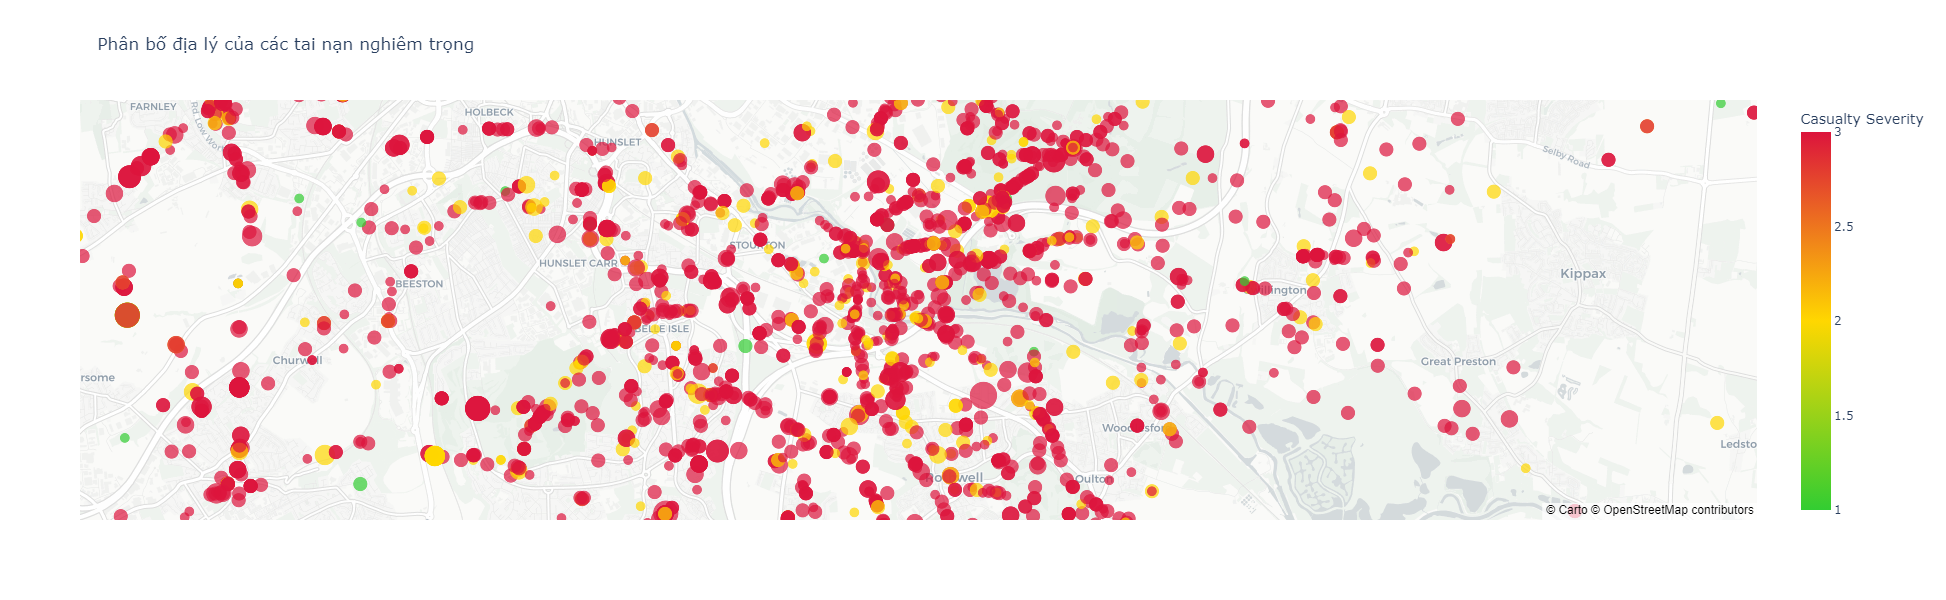

In [6]:
# Định nghĩa CRS cho Lưới Quốc gia Anh (OSGB36) và WGS84
osgb36 = CRS.from_epsg(27700)
wgs84 = CRS.from_epsg(4326)
transformer = Transformer.from_crs(osgb36, wgs84)

# Hàm để chuyển đổi tọa độ lưới sang lat/lon
def convert_to_lat_lon(easting, northing):
    lat, lon = transformer.transform(northing, easting)
    return lat, lon

df['Latitude'], df['Longitude'] = zip(*df.apply(lambda row: convert_to_lat_lon(row['Grid Ref: Easting'], row['Grid Ref: Northing']), axis=1))

# Trực quan hóa
fig = px.scatter_mapbox(df[df['Casualty Severity'] > 0], 
                        lat='Latitude', lon='Longitude', 
                        color='Casualty Severity', size='Number of Vehicles',
                        hover_data=['Casualty Severity', 'Local Authority', 'Type of Vehicle'],
                        title='Phân bố địa lý của các tai nạn nghiêm trọng',
                        color_continuous_scale=["#32CD32",  
                                                "#FFD700",  
                                                "#DC143C"])  

fig.update_layout(mapbox_style="carto-positron", width=1000, height=600, mapbox_zoom=12)  # Điều chỉnh kích thước và cố định mức độ zoom
fig.show()

**Kỹ thuật trực quan sử dụng:**

- ***Màu sắc:*** Biểu đồ sử dụng các sắc độ từ xanh lá đến đỏ để biểu thị mức độ nghiêm trọng của tai nạn:
  - Màu xanh lá: mức độ nghiêm trọng thấp nhất (Severity 1).
  - Màu vàng: mức độ nghiêm trọng trung bình (Severity 2).
  - Màu đỏ: mức độ nghiêm trọng cao nhất (Severity 3).
  - Sắc độ màu từ nhạt đến đậm giúp người xem dễ dàng nhận biết mức độ nghiêm trọng của tai nạn.

- ***Kích thước điểm:*** Kích thước của các điểm biểu thị số lượng phương tiện tham gia trong tai nạn, giúp người dùng dễ dàng nhận biết mức độ lớn của mỗi sự cố.

- ***Kỹ thuật Manipulate View:***
  + **Hiển thị chi tiết qua tooltip:** Khi người dùng trỏ chuột vào từng điểm trong biểu đồ, một tooltip sẽ xuất hiện hiển thị chi tiết về các yếu tố liên quan đến tai nạn đó như tọa độ, mức độ nghiêm trọng, số lượng phương tiện, và loại phương tiện tham gia. Điều này giúp người dùng có thể xem thông tin chi tiết mà không cần phải xem toàn bộ dữ liệu cùng một lúc.
  + **Phóng to thu nhỏ bản đồ:** Biểu đồ cho phép người dùng phóng to hoặc thu nhỏ để xem chi tiết khu vực cần quan sát. Điều này giúp tăng tính tương tác và tiện lợi trong việc xem xét dữ liệu theo khu vực cụ thể.

$\Rightarrow$ Giúp đồ thị trở nên rõ ràng, trực quan, và tương tác thân thiện với người dùng, cho phép họ dễ dàng nắm bắt được các xu hướng và mối quan hệ giữa các yếu tố ảnh hưởng đến mức độ nghiêm trọng của tai nạn.

**Nhận xét:**

- Nhìn chung, các tai nạn nghiêm trọng thường xảy ra nhiều ở khu vực có mật độ giao thông cao, thể hiện qua sự tập trung của các điểm màu đỏ và vàng.
- Mức độ nghiêm trọng cao nhất (Severity 3) xuất hiện nhiều ở các giao lộ hoặc các đoạn đường có mật độ giao thông cao.
- Các khu vực có ít tai nạn nghiêm trọng (màu xanh lá) chủ yếu xuất hiện ở vùng ngoại ô hoặc các tuyến đường có lưu lượng giao thông thấp hơn.
- Sự phân bố các tai nạn nghiêm trọng cho thấy cần có các biện pháp cải thiện cơ sở hạ tầng giao thông và tăng cường an toàn giao thông ở các khu vực có tần suất tai nạn cao.

$\Rightarrow$ Từ đó cho thấy tầm quan trọng của việc tăng cường giám sát và cải thiện an toàn giao thông tại các khu vực có mật độ tai nạn cao, đồng thời đưa ra các biện pháp phòng ngừa tai nạn tại các điểm nóng giao thông để giảm thiểu số lượng và mức độ nghiêm trọng của tai nạn.

### Biểu đồ

**Tiêu đề:** Dự đoán số lượng tai nạn bằng mô hình LSTM

**Loại biểu đồ:** Biểu đồ đường (Line Chart).

**Lý do lựa chọn:**
- **Phân tích đa biến hiệu quả**: Biểu đồ đường là công cụ trực quan hóa mạnh mẽ để phân tích sự khác biệt giữa giá trị thực tế và giá trị dự đoán của mô hình LSTM. Nó giúp chúng ta hiểu rõ hơn về khả năng dự đoán của mô hình trong việc theo dõi số lượng tai nạn theo thời gian.
- **Dễ dàng nhận diện mẫu và xu hướng**: Các đường nối giữa các điểm dữ liệu giúp người đọc nhận ra các mẫu và xu hướng chung. Ví dụ, chúng ta có thể thấy được mức độ chính xác của dự đoán so với dữ liệu thực tế.
- **Hỗ trợ phân tích chi tiết với bộ lọc**: Biểu đồ có thể được sử dụng để chỉ hiển thị dữ liệu trong một khoảng thời gian cụ thể, từ đó dễ dàng tập trung vào các giai đoạn có sự khác biệt lớn giữa dự đoán và thực tế.

In [7]:
data = df.copy()

data['Full Time'] = pd.to_datetime(data['Full Time'])
data['Date'] = data['Full Time'].dt.date

# Đếm số tai nạn xảy ra trong từng ngày
daily_data = data.groupby('Date').size().reset_index(name='Accident Count')
daily_data['Date'] = pd.to_datetime(daily_data['Date'])

# Ngày không xảy ra tai nạn sẽ có số tai nạn = 0
date_range = pd.date_range(start=daily_data['Date'].min(), end=daily_data['Date'].max())
full_daily_data = pd.DataFrame(date_range, columns=['Date'])
full_daily_data = full_daily_data.merge(daily_data, on='Date', how='left').fillna(0)
full_daily_data = full_daily_data.sort_values(by='Date').reset_index(drop=True)
accident_counts = full_daily_data['Accident Count'].values

In [8]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_size = int(len(accident_counts) * 0.85)
train_data, test_data = accident_counts[0:train_size], accident_counts[train_size:len(accident_counts)]

# Tạo dữ liệu chuỗi thời gian cho mô hình LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        a = data[i:(i + time_step)]
        X.append(a)
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

time_step = 10
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Chuyển đổi dữ liệu thành dạng mà LSTM yêu cầu [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [9]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(Input(shape=(time_step, 1)))
model.add(LSTM(100, return_sequences=True))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, batch_size=1, epochs=100)


Epoch 1/100
609/609 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 14.2734
Epoch 2/100
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11.1990
Epoch 3/100
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.6827
Epoch 4/100
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.9328
Epoch 5/100
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.2682
Epoch 6/100
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.7524
Epoch 7/100
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.8161
Epoch 8/100
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.9193
Epoch 9/100
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 9.3556
Epoch 10/100
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11.3576
Epoch 11/100
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 11.7920
Epoch 12/100
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.7874
Epoch 13/100
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.0435
Epoch 14/100
609/609 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 10.4628
Epoch 15/100
609/609 ━━━━━━━━━━

In [10]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Train RMSE: 0.792015353955917
Test RMSE: 4.657077759931643


C:\Users\Admin\anaconda3\Lib\site-packages\_plotly_utils\basevalidators.py:106: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



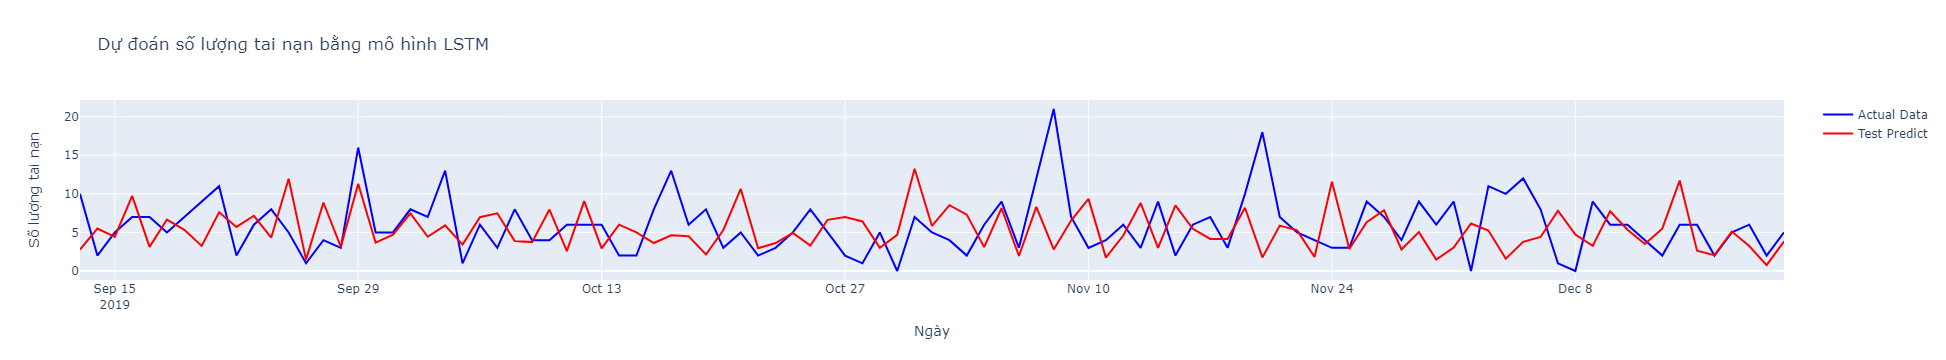

In [11]:
# Vẽ biểu đồ kết quả dự đoán và giá trị thực tế
test_plot = test_predict.flatten()
test_date = date_range[train_size:len(accident_counts)]
test_date = test_date[:len(test_plot)]

_df = pd.DataFrame({
    'Date': test_date,
    'Test Predict': test_plot,
    'Actual Data': test_data[:len(test_plot)]
})

# Tạo các trace cho dữ liệu dự đoán và thực tế
trace1 = go.Scatter(x=_df['Date'], y=_df['Actual Data'], mode='lines', name='Actual Data', line=dict(color='blue'))
trace2 = go.Scatter(x=_df['Date'], y=_df['Test Predict'], mode='lines', name='Test Predict', line=dict(color='red'))

# Tạo layout cho biểu đồ
layout = go.Layout(
    title='Dự đoán số lượng tai nạn bằng mô hình LSTM',
    xaxis=dict(title='Ngày'),
    yaxis=dict(title='Số lượng tai nạn'),
    hovermode='closest'
)

fig = go.Figure(data=[trace1, trace2], layout=layout)
fig.show()

**Kỹ thuật trực quan sử dụng:**

- ***Màu sắc***: Biểu đồ sử dụng màu sắc để phân biệt giữa dữ liệu thực tế và dữ liệu dự đoán:
    - Màu xanh dương: biểu thị dữ liệu thực tế (Actual Data).
    - Màu đỏ: biểu thị dữ liệu dự đoán (Test Predict).

- ***Kỹ thuật Manipulate View:***
  + **Hiển thị chi tiết qua tooltip**: Khi người dùng trỏ chuột vào từng điểm dữ liệu, một tooltip sẽ xuất hiện hiển thị chi tiết về ngày và số lượng tai nạn cụ thể. Điều này giúp người dùng có thể xem thông tin chi tiết mà không cần phải xem toàn bộ dữ liệu cùng một lúc.
  + **Tùy chỉnh giao diện hiển thị**: Biểu đồ có thể được điều chỉnh để hiển thị dữ liệu theo một khoảng thời gian nhất định, giúp người dùng dễ dàng tập trung vào những thông tin mà họ quan tâm.

$\Rightarrow$ Giúp đồ thị trở nên rõ ràng, trực quan, và tương tác thân thiện với người dùng, cho phép họ dễ dàng nắm bắt được các xu hướng và sự khác biệt giữa giá trị thực tế và giá trị dự đoán.

**Nhận xét:**

- Nhìn chung, mô hình LSTM có khả năng dự đoán khá sát so với dữ liệu thực tế, tuy nhiên vẫn có những khoảng thời gian mà mô hình dự đoán không chính xác hoàn toàn.
- Các giá trị dự đoán thường có xu hướng gần đúng với xu hướng tổng quát của dữ liệu thực tế, nhưng vẫn có những đỉnh và đáy không khớp hoàn toàn.
- Điều này cho thấy mô hình LSTM có tiềm năng tốt trong việc dự đoán số lượng tai nạn, nhưng vẫn cần cải thiện thêm để tăng độ chính xác, đặc biệt là trong những thời điểm có biến động lớn về số lượng tai nạn.

$\Rightarrow$ Từ đó cho thấy tầm quan trọng của việc tiếp tục cải tiến mô hình và thu thập dữ liệu chất lượng để giảm thiểu sai lệch giữa dự đoán và thực tế, giúp các cơ quan chức năng có thể đưa ra các biện pháp phòng ngừa tai nạn hiệu quả hơn.

### Biểu đồ

**Tiêu đề:** Loại phương tiện nào ghi nhận số vụ tai nạn cao nhất

**Loại biểu đồ:** Biểu đồ cột (Bar Chart).

**Lý do lựa chọn:**
- **Trực quan hóa rõ ràng và trực tiếp**: Biểu đồ cột là một công cụ trực quan hóa dữ liệu đơn giản và hiệu quả, giúp biểu diễn số lượng sự kiện trong các nhóm khác nhau một cách rõ ràng. Trong biểu đồ này, số vụ tai nạn được gộp thành các nhóm (car, motorcycle, public transports, goods vehicle, other vehicle) và số lượng sự kiện trong mỗi nhóm được biểu diễn bằng chiều dài của các cột.

- **Dễ dàng so sánh số lượng giữa các nhóm**: Sự khác biệt về chiều cao của các cột giúp người đọc dễ dàng so sánh số lượng sự kiện giữa các nhóm phương tiện. 
- **Tập trung vào một khía cạnh cụ thể**: Biểu đồ cột giúp tập trung vào một khía cạnh cụ thể của dữ liệu, đó là số vụ tai nạn. Điều này rất hữu ích khi cần phân tích sâu về mức độ nghiêm trọng của phương tiện gây ra tai nạn.

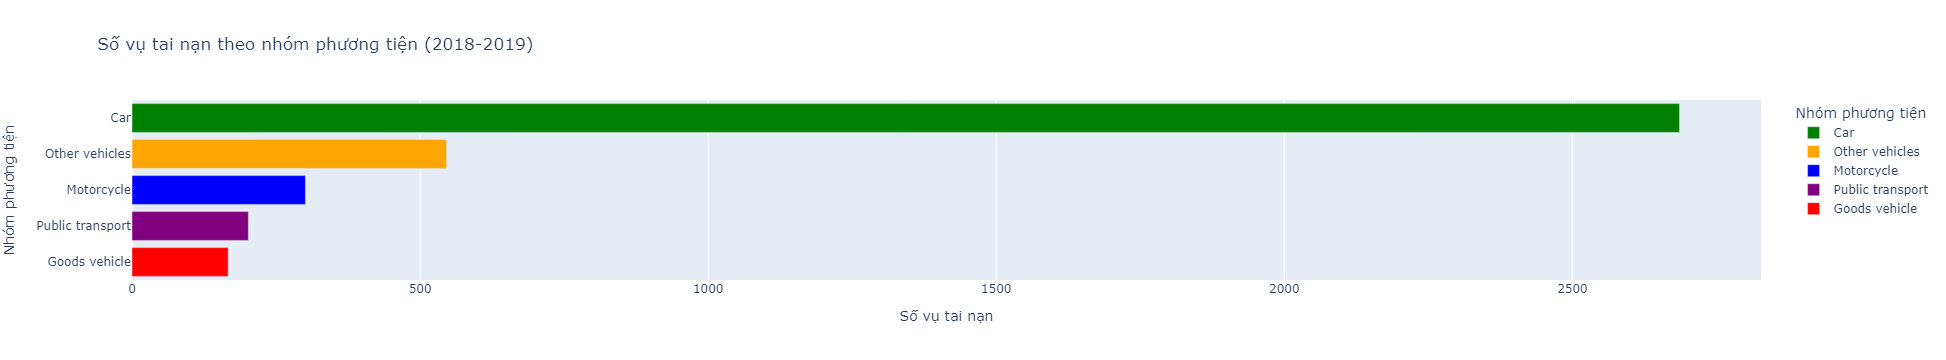

In [12]:
data=df.copy()
# Danh sách mô tả loại phương tiện
vehicle_desc = {
    1: 'Pedal cycle',
    2: 'M/cycle 50cc and under',
    3: 'Motorcycle over 50cc and up to 125cc',
    4: 'Motorcycle over 125cc and up to 500cc',
    5: 'Motorcycle over 500cc',
    6: '[Not used]',
    7: '[Not used]',
    8: 'Taxi/Private hire car',
    9: 'Car',
    10: 'Minibus (8 – 16 passenger seats)',
    11: 'Bus or coach (17 or more passenger seats)',
    12: '[Not used]',
    13: '[Not used]',
    14: 'Other motor vehicle',
    15: 'Other non-motor vehicle',
    16: 'Ridden horse',
    17: 'Agricultural vehicle (includes diggers etc.)',
    18: 'Tram / Light rail',
    19: 'Goods vehicle 3.5 tonnes mgw and under',
    20: 'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw',
    21: 'Goods vehicle 7.5 tonnes mgw and over',
    22: 'Mobility Scooter',
    90: 'Other Vehicle',
    97: 'Motorcycle - Unknown CC'
}

# Đổi tên cột 'Type of Vehicle' nếu cần
data.rename(columns=lambda x: x.strip(), inplace=True)

# Thay thế mã phương tiện bằng mô tả
data['Type of Vehicle Desc'] = data['Type of Vehicle'].map(vehicle_desc)

# Gom nhóm các loại phương tiện vào các nhóm lớn
def group_vehicle_type(vehicle):
    if vehicle in [
        'M/cycle 50cc and under',
        'Motorcycle over 50cc and up to 125cc',
        'Motorcycle over 125cc and up to 500cc',
        'Motorcycle over 500cc',
        'Motorcycle - Unknown CC'
    ]:
        return 'Motorcycle'
    elif vehicle in ['Car', 'Taxi/Private hire car']:
        return 'Car'
    elif vehicle in [
        'Goods vehicle 3.5 tonnes mgw and under',
        'Goods vehicle over 3.5 tonnes and under 7.5 tonnes mgw',
        'Goods vehicle 7.5 tonnes mgw and over'
    ]:
        return 'Goods vehicle'
    elif vehicle in [
        'Bus or coach (17 or more passenger seats)',
        'Minibus (8 – 16 passenger seats)',
        'Tram / Light rail'
    ]:
        return 'Public transport'
    elif vehicle in [
        'Pedal cycle', 'Other motor vehicle', 'Other non-motor vehicle',
        'Ridden horse', 'Agricultural vehicle (includes diggers etc.)',
        'Mobility Scooter', 'Other Vehicle'
    ]:
        return 'Other vehicles'
    else:
        return vehicle

data['Grouped Vehicle Type'] = data['Type of Vehicle Desc'].apply(group_vehicle_type)

# Đếm số vụ tai nạn theo nhóm phương tiện
grouped_vehicle_counts = data['Grouped Vehicle Type'].value_counts().reset_index()
grouped_vehicle_counts.columns = ['Grouped Vehicle Type', 'Count']

# Chuẩn bị dữ liệu cho từng loại phương tiện trong mỗi nhóm
detail_counts = data.groupby(['Grouped Vehicle Type', 'Type of Vehicle Desc']).size().reset_index(name='Count')


# Màu sắc tùy chỉnh cho các nhóm phương tiện
color_map = {
    'Motorcycle': 'blue',
    'Car': 'green',
    'Goods vehicle': 'red',
    'Public transport': 'purple',
    'Other vehicles': 'orange'
}

# Vẽ biểu đồ tương tác
fig = px.bar(grouped_vehicle_counts, 
             x='Count', 
             y='Grouped Vehicle Type', 
             # text='Count',
             title='Số vụ tai nạn theo nhóm phương tiện (2018-2019)',
             labels={'Count': 'Số vụ tai nạn', 'Grouped Vehicle Type': 'Nhóm phương tiện'},
             color='Grouped Vehicle Type',
             color_discrete_map=color_map)


# Hiển thị biểu đồ
fig.show()

**Kỹ thuật trực quan sử dụng:**

- ***Màu sắc***: Sử dụng màu sắc đa dạng giúp phân biệt dễ dàng giữa các nhóm phương tiện. Màu sắc cần phải được chọn sao cho phù hợp và dễ nhìn, tránh sự mơ hồ hoặc khó nhận biết.
    - Motorcycle: blue
    - Car: green
    - Goods vehicle: red
    - Public transport: purple
    - Other vehicles: orange.

- ***Kỹ thuật Manipulate View:***  + **Hiển thị chi tiết qua tooltip**: Khi người dùng trỏ chuột vào từng cột trong biểu đồ, một tooltip sẽ xuất hiện hiển thị số lượng sự kiện cụ thể tại số vụ tai nạn. Điều này giúp người dùng có thể xem thông tin chi tiết mà không cần phải xem toàn bộ dữ liệu cùng một lúc.
- ***Kỹ thuật Reduce:***:    + Kỹ thuật này giúp giảm bớt sự phức tạp bằng cách gom nhóm các loại phương tiện lại với nhau. Điều này làm cho dữ liệu dễ hiểu hơn và giúp chúng ta tập trung vào các nhóm chính, thay vì phải xem xét từng loại phương tiện một cách riêng lẻ..

$\Rightarrow$ Giúp đồ thị trở nên rõ ràng, trực quan, và tương tác thân thiện với người dùn giảm thiểu sự phức tạp, tránh gây rối mắt cho người xem, làm tăng tính thể hiện cho biểu đồ.n



**Nhận xét:*
- Nhìn chung, số lượng sự kiện có sự phân bố không đồng đều giữa các nhóm phương tiện.
- Số lượng tai nạn cao nhất xảy ra ở nhóm phương tiện "car", với số lượng vượt trội so với các nhóm khác. Điều này có thể chỉ ra rằng tai nạn do nhóm phương tiện "car" gây ra phổ biến nhất hoặc xảy ra thường xuyên.
- Các nhóm phương tiện còn lại có số vụ tai nạn tương đối thấp hơn nhiều so với nhóm phương tiện "car" nhưng vẫn đáng kể.

$\Rightarrow$ Từ đó cho thấy tầm quan trọng của việc quản lý và kiểm soát an toàn để giảm thiểu số lượng vụ tai nạn. Cần có các biện pháp đặc biệt để giảm thiểu các vụ tai nạn gây ra bởi nhóm phương tiện "car"n.

### Biểu đồ

**Tiêu đề:** Điều kiện đường sá (Dry, Wet/ Damp, Snow, Frost/Ice, Flood ) mối tương quan như thế nào với số lượng và mức độ nghiêm trọng của tai nạn.

**Loại biểu đồ:** Biểu đồ Heatmap.

- **Lý do lựa chọn:**
    + **Tính trực quan:** Heatmap sử dụng màu sắc để đại diện cho các giá trị dữ liệu, giúp người xem dễ dàng nhận biết các mẫu và xu hướng trong dữ liệu một cách trực quan. Bằng cách này, bạn có thể nhanh chóng nhận ra các điểm nổi bật hoặc khu vực mà cần được chú ý.
    + **Dễ thấy sự khác biệt và xu hướng**: Sự thay đổi màu sắc trên Heatmap giúp người đọc dễ dàng nhận ra các xu hướng và điểm nóng trong dữ liệu. 
    + **Phân tích theo thời gian và không gian**: Với Heatmap, chúng ta có thể phân tích dữ liệu tai nạn theo điều kiện đường sá và mức độ nghiêm trọng. Điều này rất hữu ích để phát hiện ra các mẫu hoặc xu hướng tiềm ẩn trong dữ liệu, từ đó có thể đề xuất các biện pháp cải thiện an toàn giao thông.


Casualty Severity Desc  Fatal  Serious  Slight
Road Surface Desc                             
Dry                        31      462    2392
Flood                       0        2       5
Frost / Ice                 0        7      30
Snow                        0        3      22
Wet / Damp                 17      170     759


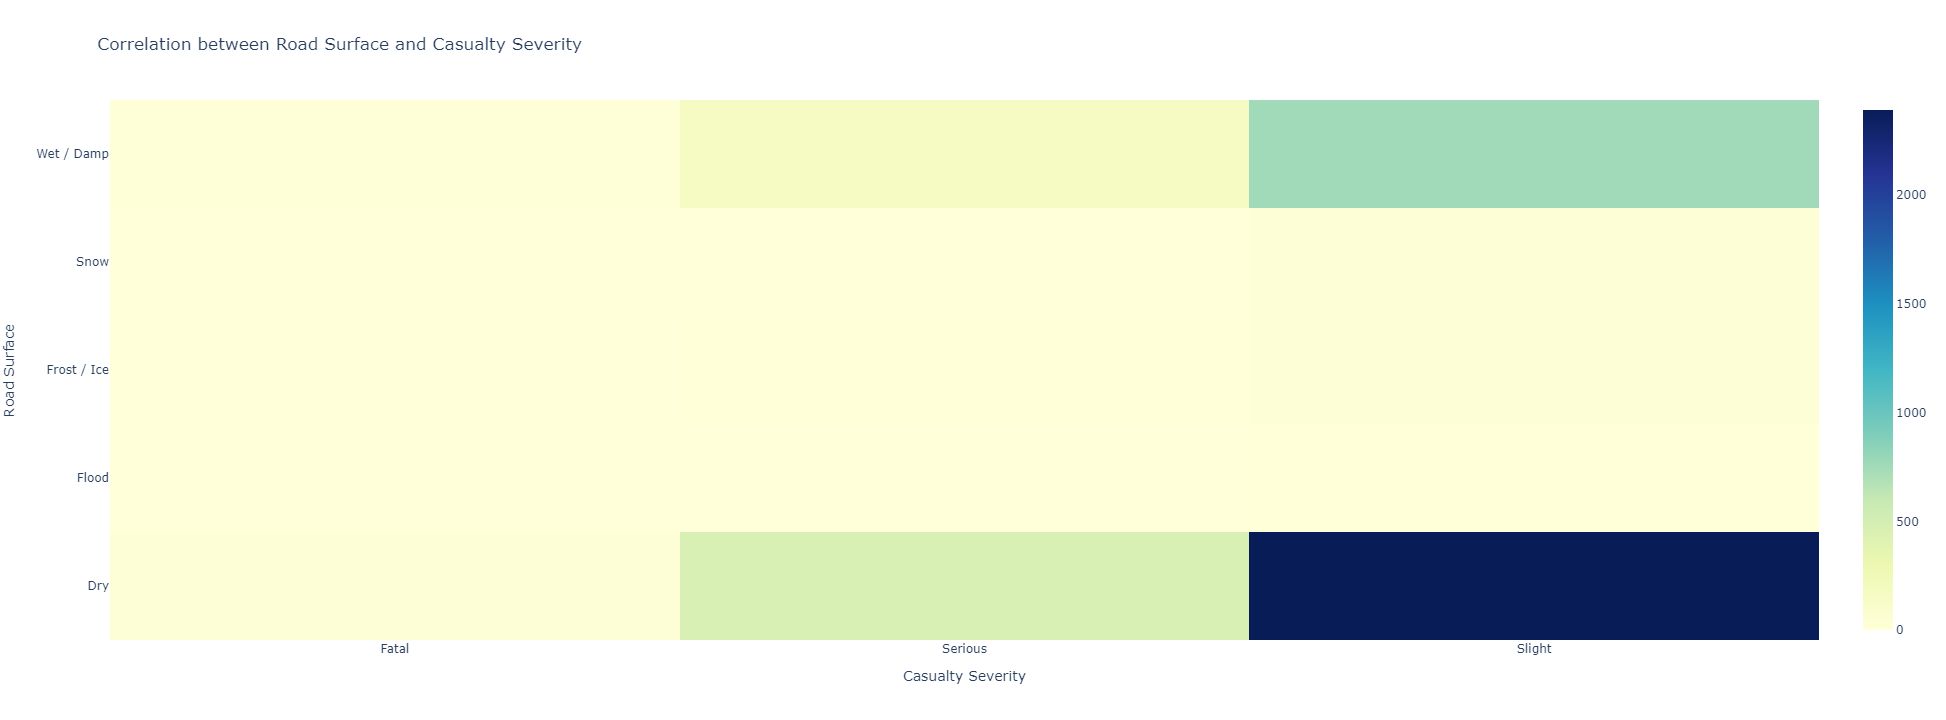

In [13]:
data=df.copy()
# Danh sách mô tả loại đường
road_surface_desc = {
    1: 'Dry',
    2: 'Wet / Damp',
    3: 'Snow',
    4: 'Frost / Ice',
    5: 'Flood' 
}
casualty_severity_desc = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight'
}


data.rename(columns=lambda x: x.strip(), inplace=True)

# Thay thế
data['Road Surface Desc'] = data['Road Surface'].map(road_surface_desc)
data['Casualty Severity Desc'] = data['Casualty Severity'].map(casualty_severity_desc)

crosstab_data = pd.crosstab(
    data["Road Surface Desc"],
    data["Casualty Severity Desc"],
)
print(crosstab_data)

# # Create a heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(crosstab_data, annot=True, fmt="d", cmap="YlGnBu", cbar=True)

# # Set plot labels and title
# plt.title("Correlation between Road Surface and Casualty Severity", fontsize=16, pad=20)

# plt.xlabel("Casualty Severity", fontsize=14, labelpad=20)
# plt.ylabel("Road Surface", fontsize=14, labelpad=20)

# # Show the plot
# plt.show()

# Create heatmap figure
fig = go.Figure(data=go.Heatmap(
                   z=crosstab_data.values,
                   x=crosstab_data.columns,
                   y=crosstab_data.index,
                   colorscale='YlGnBu',
                   hoverongaps=False,
                   text=crosstab_data.values,  # Thêm số liệu vào text
                   hovertemplate='Road Surface: %{y}<br>Casualty Severity: %{x}<br>Total Accidents: %{text}<extra></extra>'  # Định dạng template cho hover
))

# Customize layout
fig.update_layout(
    title="Correlation between Road Surface and Casualty Severity",
    xaxis=dict(title="Casualty Severity"),
    yaxis=dict(title="Road Surface"),
    width=1280,  # Kích thước chiều rộng
    height=720   # Kích thước chiều cao
)

# Show the plot
fig.show()

**Kỹ thuật trực quan sử dụng:**

- ***Màu sắc***: Bảng màu YlGnBu sử dụng một gradient màu từ màu vàng (Yl) đến màu xanh lam (Bu), giúp dễ dàng phân biệt các giá trị khác biệt. Màu sắc trong bảng màu này phản ánh các giá trị dữ liệu từ thấp đến cao, từ màu vàng (thấp nhất) đến màu xanh lam (cao nhất), giúp người xem nhanh chóng hiểu được phân phối của dữ liệu.

- ***Kỹ thuật Manipulate View:***
  + **Hiển thị chi tiết qua tooltip**: Khi người dùng trỏ chuột vào từng ô trong heatmap, một tooltip sẽ xuất hiện hiển thị số lượng tai nạn cụ thể tại khung giờ và ngày trong tuần đó. Điều này giúp người dùng có thể xem thông tin chi tiết mà không cần phải xem toàn bộ dữ liệu cùng một lúc.

$\Rightarrow$ Giúp đồ thị heatmap trở nên rõ ràng, trực quan, và tương tác thân thiện với người dùng, cho phép họ dễ dàng nắm bắt được các xu hướng và điểm nóng về số lượng tai nạn giao thông.

**Nhận xét:**
- Đường khô: Có số vụ tai nạn cao nhất (chiếm 31 vụ tử vong, 462 vụ nghiêm trọng và 2392 vụ nhẹ). Nguy hiểm nhất khi tham gia giao thông do có tỷ lệ tử vong và tai nạn nghiêm trọng cao nhất.
- Đường ướt/ẩm: Xếp thứ hai về số vụ tai nạn (chiếm 17 vụ tử vong, 170 vụ nghiêm trọng và 759 vụ nhẹ).
- Các điều kiện khác: Có số vụ tai nạn ít hơn đáng kể (0-7 vụ tử vong, 2-30 vụ nghiêm trọng, 5-22 vụ nhẹ).
- Điều kiện đường trơn trượt (ướt/ẩm, đóng băng, tuyết rơi): Nguy cơ xảy ra tai nạn cao hơn so với đường khô, đặc biệt là tai nạn nghiêm trọng.

$\Rightarrow$ Điều kiện mặt đường có ảnh hưởng đáng kể đến số vụ tai nạn và mức độ nghiêm trọng của tai nạn giao thông. Cần chú ý nâng cao ý thức và cẩn trọng khi tham gia giao thông, đặc biệt là trên đường trơn trượt.